In [1]:
import os
import shutil

# مسارات المجلدات
train_folder_path = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_folder_path = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
merged_folder_path = "/kaggle/working/Merged_Data"  # مسار مجلد الدمج

# إنشاء مجلد الدمج إذا لم يكن موجودًا
os.makedirs(merged_folder_path, exist_ok=True)

# الحصول على قائمة الكلاسات
classes = [f.name for f in os.scandir(train_folder_path) if f.is_dir()]

# دمج الصور لكل كلاس
for class_name in classes:
    # مسارات فولدر الكلاس في train و test
    train_class_path = os.path.join(train_folder_path, class_name)
    test_class_path = os.path.join(test_folder_path, class_name)

    # إنشاء فولدر الكلاس في مجلد الدمج
    merged_class_path = os.path.join(merged_folder_path, class_name)
    os.makedirs(merged_class_path, exist_ok=True)

    # نسخ الصور من train
    for image_file in os.listdir(train_class_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy(os.path.join(train_class_path, image_file), merged_class_path)

    # نسخ الصور من test
    for image_file in os.listdir(test_class_path):
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            shutil.copy(os.path.join(test_class_path, image_file), merged_class_path)

print("تم دمج الصور بنجاح!")

تم دمج الصور بنجاح!


In [2]:
import cv2
import numpy as np
import os
import glob
from collections import defaultdict

# 🔹 **دوال التحسينات**
def flip_augmentations(img):
    """Apply 3 different flips (excluding the original)."""
    return {
        "flip_horizontal": cv2.flip(img, 1),  # Flip left-right
        "flip_vertical": cv2.flip(img, 0),  # Flip up-down
        "flip_both": cv2.flip(img, -1),  # Flip both axes
    }

def rotate_augmentations(img):
    """Apply 3 different rotations."""
    return {
        "rotate_90_CW": cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE),
        "rotate_90_CCW": cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE),
        "rotate_180": cv2.rotate(img, cv2.ROTATE_180),
    }

# 🔹 **المجلد الرئيسي للصور الأصلية والمعدلة**
root_folder = "/kaggle/working/Merged_Data"

# 🔹 **جلب جميع الصور من المجلدات الفرعية وتصنيفها حسب الفئات**
image_paths = glob.glob(os.path.join(root_folder, "**", "*.jpg"), recursive=True)

# 🔹 **تصنيف الصور داخل كل كلاس**
class_images = defaultdict(list)
for image_path in image_paths:
    class_name = os.path.basename(os.path.dirname(image_path))  # اسم الفولدر (الكلاس)
    class_images[class_name].append(image_path)

# 🔹 **تحديد الحد الأقصى لكل كلاس**
MAX_IMAGES_PER_CLASS = 600

# 🔹 **تطبيق التحسينات مع الحفظ داخل نفس المسار**
for class_name, images in class_images.items():
    num_original = len(images)
    
    # تحديد المجلد الجديد للكلاس (نفس المجلد الأصلي)
    save_class_folder = os.path.join(root_folder, class_name)
    os.makedirs(save_class_folder, exist_ok=True)

    print(f"🔹 الكلاس: {class_name} - الصور الأصلية: {num_original}")

    if num_original >= MAX_IMAGES_PER_CLASS:
        print(f"✅ لا حاجة للتحسينات، عدد الصور في {class_name} كافٍ ({num_original})")
        continue  # تخطي هذا الكلاس إذا كان يحتوي بالفعل على الحد المطلوب

    # 🔹 **توليد صور Augmentation حتى يصل العدد إلى الحد المطلوب**
    needed_images = MAX_IMAGES_PER_CLASS - num_original
    generated_count = 0

    for image_path in images:
        if generated_count >= needed_images:
            break  # إذا وصلنا إلى العدد المطلوب، نخرج من اللوب

        img = cv2.imread(image_path)
        if img is None:
            continue

        # تطبيق التحسينات
        augmentations = {**flip_augmentations(img), **rotate_augmentations(img)}

        for aug_type, aug_img in augmentations.items():
            if generated_count >= needed_images:
                break

            # توليد اسم جديد مع تجنب استبدال الملفات الأصلية
            save_filename = f"{os.path.splitext(os.path.basename(image_path))[0]}_{aug_type}.jpg"
            save_filepath = os.path.join(save_class_folder, save_filename)

            # حفظ الصورة الجديدة في نفس مجلد الصورة الأصلية
            cv2.imwrite(save_filepath, aug_img)
            generated_count += 1

    print(f"✅ تم إنشاء {generated_count} صورة جديدة في {class_name}, ليصبح الإجمالي {min(MAX_IMAGES_PER_CLASS, num_original + generated_count)} صورة.")

print(f"\n🎯 تم حفظ جميع الصور بعد التحسينات داخل نفس مجلد الصور الأصلية!")

🔹 الكلاس: melanoma - الصور الأصلية: 600
✅ لا حاجة للتحسينات، عدد الصور في melanoma كافٍ (600)
🔹 الكلاس: basal cell carcinoma - الصور الأصلية: 600
✅ لا حاجة للتحسينات، عدد الصور في basal cell carcinoma كافٍ (600)
🔹 الكلاس: squamous cell carcinoma - الصور الأصلية: 600
✅ لا حاجة للتحسينات، عدد الصور في squamous cell carcinoma كافٍ (600)
🔹 الكلاس: vascular lesion - الصور الأصلية: 600
✅ لا حاجة للتحسينات، عدد الصور في vascular lesion كافٍ (600)
🔹 الكلاس: nevus - الصور الأصلية: 600
✅ لا حاجة للتحسينات، عدد الصور في nevus كافٍ (600)
🔹 الكلاس: dermatofibroma - الصور الأصلية: 600
✅ لا حاجة للتحسينات، عدد الصور في dermatofibroma كافٍ (600)
🔹 الكلاس: pigmented benign keratosis - الصور الأصلية: 600
✅ لا حاجة للتحسينات، عدد الصور في pigmented benign keratosis كافٍ (600)
🔹 الكلاس: seborrheic keratosis - الصور الأصلية: 560
✅ تم إنشاء 40 صورة جديدة في seborrheic keratosis, ليصبح الإجمالي 600 صورة.
🔹 الكلاس: actinic keratosis - الصور الأصلية: 600
✅ لا حاجة للتحسينات، عدد الصور في actinic keratosis كافٍ

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def build_model(input_shape=(256, 256, 3), num_classes=9):
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    model.add(Dropout(rate=0.3))
    model.add(Dense(units=512, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Dense(units=256, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Dense(units=num_classes, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
    
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, X_test, y_test, epochs=25, batch_size=128):
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        shuffle=True
    )
    return history

def plot_training(history):
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight')
    epochs_range = range(1, len(tr_acc) + 1)
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, tr_loss, 'r', label='Training loss')
    plt.plot(epochs_range, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=f'best epoch= {index_loss + 1}')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, tr_acc, 'r', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=f'best epoch= {index_acc + 1}')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

def print_accuracy(model, X_test, y_test):
    train_acc = model.evaluate(X_test, y_test, verbose=0)[1] * 100
    print(f"Test Accuracy: {train_acc:.2f}%")

def make_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    con_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    sns.heatmap(con_matrix, annot=True, fmt='d')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    
    print(classification_report(y_true_classes, y_pred_classes))

In [4]:
def load_dataset_without_processing(folder_path, img_size=(256, 256)):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))
    class_dict = {class_name: i for i, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    img = img / 255.0  # Normalize
                    images.append(img)
                    labels.append(class_dict[class_name])
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

folder_path = "/kaggle/working/Merged_Data"
images, labels = load_dataset_without_processing(folder_path)

In [5]:
labels_encoded = to_categorical(labels, num_classes=9)

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
print(X_train.shape)

(4288, 256, 256, 3)


In [6]:
model = build_model(input_shape=(256, 256, 3))

In [7]:
history = train_model(model, X_train, y_train, X_test, y_test, epochs=25, batch_size=64)

Epoch 1/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 68s 576ms/step - accuracy: 0.3034 - loss: 2.0182 - val_accuracy: 0.1026 - val_loss: 4.5269
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.5031 - loss: 1.3260 - val_accuracy: 0.1325 - val_loss: 2.8304
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.5420 - loss: 1.1830 - val_accuracy: 0.1660 - val_loss: 2.8337
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.6052 - loss: 1.0554 - val_accuracy: 0.2211 - val_loss: 2.4235
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.6778 - loss: 0.8973 - val_accuracy: 0.3694 - val_loss: 1.8060
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.7053 - loss: 0.8331 - val_accuracy: 0.5205 - val_loss: 1.3234
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.7235 - loss: 0.7592 - val_accuracy: 0.5065 - val_loss: 1.4454
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.7456 - loss: 0.6926 - val_accu

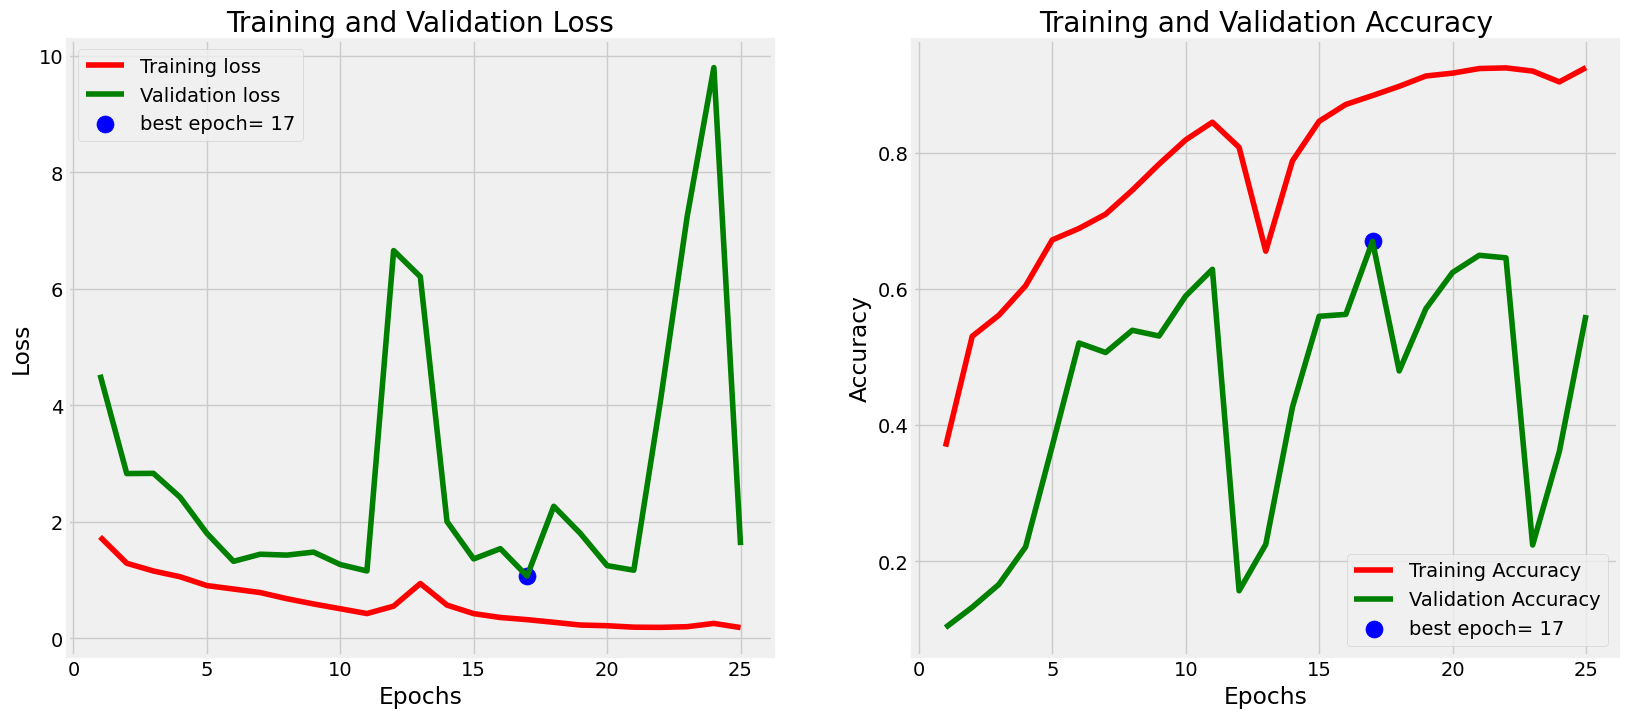

In [8]:
plot_training(history)

In [9]:
print_accuracy(model, X_test, y_test)

Test Accuracy: 56.16%


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


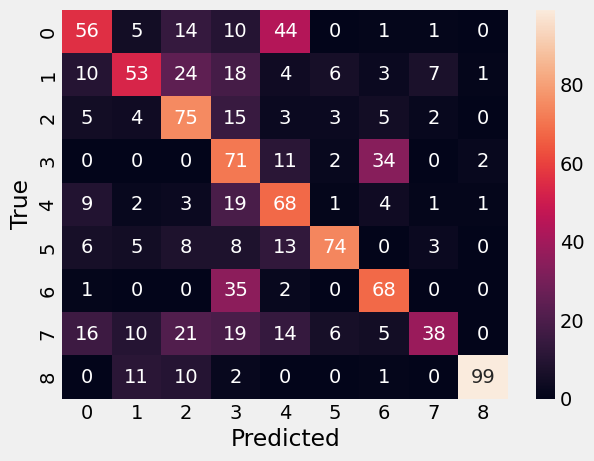

              precision    recall  f1-score   support

           0       0.54      0.43      0.48       131
           1       0.59      0.42      0.49       126
           2       0.48      0.67      0.56       112
           3       0.36      0.59      0.45       120
           4       0.43      0.63      0.51       108
           5       0.80      0.63      0.71       117
           6       0.56      0.64      0.60       106
           7       0.73      0.29      0.42       129
           8       0.96      0.80      0.88       123

    accuracy                           0.56      1072
   macro avg       0.61      0.57      0.57      1072
weighted avg       0.61      0.56      0.56      1072



In [10]:
make_predictions(model, X_test, y_test)

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_and_preprocess_image(image_path, resize_dim=(256, 256)):
    """Load an image, convert to grayscale, enhance contrast, and resize."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    equalized = cv2.equalizeHist(blurred)
    gray_resized = cv2.resize(equalized, resize_dim)
    color_resized = cv2.resize(image, resize_dim)
    return color_resized, gray_resized

def has_black_borders(img, threshold=10):
    """Check if the image has black borders."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = gray > threshold  # Detect non-black areas
    return not np.all(mask)  # Returns True if borders exist

def zoom_until_no_borders(img, zoom_step=10):
    """Keep zooming in (cropping) until no black borders remain."""
    while has_black_borders(img):
        h, w, _ = img.shape
        x_min, x_max = zoom_step, w - zoom_step
        y_min, y_max = zoom_step, h - zoom_step

        if x_min >= x_max or y_min >= y_max:
            break  # Stop if image becomes too small

        img = img[y_min:y_max, x_min:x_max]
    return img

def process_image(image_path):
    """Load the image, check for black borders, and zoom in if necessary."""
    img = cv2.imread(image_path)
    if has_black_borders(img):
        img = zoom_until_no_borders(img)
    return img

def load_dataset(folder_path, img_size=(256, 256)):
    """Load dataset, resize images, and normalize them."""
    images = []
    gray_images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))
    class_dict = {class_name: i for i, class_name in enumerate(class_names)}
    
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = process_image(img_path)  # Process image
                color_img, gray_img = load_and_preprocess_image(img_path, img_size)
                if img is not None:
                    images.append(color_img / 255.0)  # Normalize
                    gray_images.append(gray_img / 255.0)
                    labels.append(class_dict[class_name])
    
    images = np.array(images)
    gray_images = np.array(gray_images)
    labels = np.array(labels)
    return images, gray_images, labels

# Load dataset
folder_path = "/kaggle/working/Merged_Data"
images, gray_images, labels = load_dataset(folder_path)

In [4]:
# Process and train on color images
labels_encoded = to_categorical(labels, num_classes=9)

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
print(X_train.shape)

(4305, 256, 256, 3)


In [7]:
model = build_model(input_shape=(256, 256, 3))

In [ ]:
history = train_model(model, X_train, y_train, X_test, y_test, epochs=25, batch_size=64)

In [ ]:
plot_training(history)

In [ ]:
print_accuracy(model, X_test, y_test)

In [ ]:
make_predictions(model, X_test, y_test)

In [ ]:
# Process and train on color images
labels_encoded = to_categorical(labels, num_classes=9)

# Process and train on grayscale images
X_train, X_test, y_train, y_test = train_test_split(gray_images, labels_encoded, test_size=0.2, random_state=42)
print(X_train.shape)

In [ ]:
model = build_model(input_shape=(256, 256, 3))

In [ ]:
history = train_model(model, X_train, y_train, X_test, y_test, epochs=25, batch_size=64)

In [ ]:
plot_training(history)

In [ ]:
print_accuracy(model, X_test, y_test)

In [ ]:
make_predictions(model, X_test, y_test)